GPU Version으로 변경

In [25]:
#GPU Version으로 변경
!pip3 install pillow==4.1.1
%reload_ext autoreload
%autoreload

    100% |################################| 5.7MB 390kB/s eta 0:00:011
    100% |################################| 112kB 8.2MB/s eta 0:00:01
  Running setup.py bdist_wheel for olefile ... done
  Stored in directory: /home/theia/.cache/pip/wheels/4b/f4/11/bc4166107c27f07fd7bba707ffcb439619197638a1ac986df3
Successfully built olefile


## Prepare Data

Crawling을 통하여 각각의 Poodle과 Siamesecat에대한 Image를 각각 20개 저장

<a href="https://wjddyd66.github.io/python/2019/09/18/Pytube,Selenium.html">Crawling 코드 및 설명</a>

## 1. Settings
### 1) Import required libraries

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torch.utils.data as data
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

### 2) Hyperparameter

In [2]:
batch_size= 1
learning_rate = 0.0002
num_epoch = 300

## 2. Data Loader

- https://pytorch.org/docs/stable/torchvision/datasets.html?highlight=imagefolder#torchvision.datasets.ImageFolder
- ImageFolder라는 함수를 이용해 따로 이미지-라벨 쌍을 만들지 않고 폴더에 저장하는것만으로 쉽게 이미지-라벨 쌍을 만들 수 있습니다.

ex)

root/dog/xxx.png

root/dog/xxy.png

root/cat/123.png

root/cat/nsdf3.png

                    

**ImageFolder**  
<code>torchvision.datasets.ImageFolder(root, transform=None, target_transform=None, loader=function default_loader, is_valid_file=None) </code>  

**transform.Compose**  
<code>torchvision.transforms.Compose(transforms)</code>
- tranforms: list of Transform object

image Tranformation을 chained together할 수 있게 해준다.

**transform.Resize**  
<code>torchvision.transforms.Resize(size, interpolation=2)</code>
- size: 변경하고자 하는 image 크기
- interpolation: Desired interpolation. Default is PIL.Image.BILINEAR

Image 크기 변경.

**transform.RandomResizedCrop**  
<code>torchvision.transforms.RandomResizedCrop(size, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=2)</code>
- size: 샘플링할 Image 크기
- scale: 원본 Image에서 자를 크기
- ratio: 원본 Image에서 자른 크기에서 참조할 비율
- interpolation – Default: PIL.Image.BILINEAR 

랜덤한 위치에서 샘플링.

**transform.RandomHorizontalFlip**  
<code>torchvision.transforms.RandomHorizontalFlip(p=0.5)</code>
- p: 확률(image 좌우 반전 시킬 확률)

In [3]:
# 라벨(혹은 클래스) 별로 폴더가 저장되어 있는 루트 디렉토리를 지정합니다.
img_dir = "./images"

# 해당 루트 디렉토리를 ImageFolder 함수에 전달합니다.
# 이때 이미지들에 대한 변형도 같이 전달해줍니다.
img_data = dset.ImageFolder(img_dir, transforms.Compose([
                                      transforms.Resize(256),                   # 이미지 크기를 256x256으로 바꿔줍니다.
                                      transforms.RandomResizedCrop(224),        # 256x256 이미지의 랜덤한 위치에서 224x224 크기만큼 샘플링 합니다.
                                      transforms.RandomHorizontalFlip(),        # 랜덤한 확률로 이미지를 좌우반전 합니다.
                                      transforms.ToTensor(),                    # 이미지 데이터를 텐서로 변형합니다.
            ]))

train_loader = data.DataLoader(img_data, batch_size=batch_size,
                            shuffle=True, num_workers=2)



실제 Sampling된 Image를 확인하기 위한 작업이다.  
train_loader를 불러와서 순서와 data, label을 불러와서 확인하였다.  
각 사진의 Title은 자동으로 할당된 Label의 이름이며  
data는 train_loader가 가지고 있는 image이다.

torch.Size([224, 224])
max: 0.8980392217636108, min: 0.0235294122248888


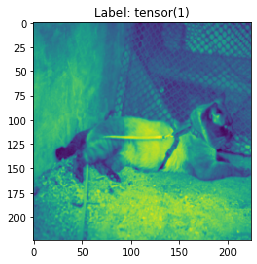

torch.Size([224, 224])
max: 0.9764705896377563, min: 0.03921568766236305


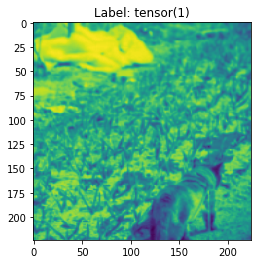

torch.Size([224, 224])
max: 0.8941176533699036, min: 0.4470588266849518


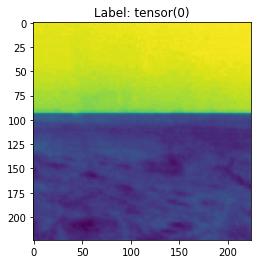

torch.Size([224, 224])
max: 1.0, min: 0.007843137718737125


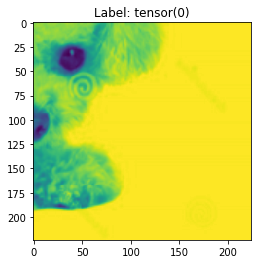

torch.Size([224, 224])
max: 0.9882352948188782, min: 0.01568627543747425


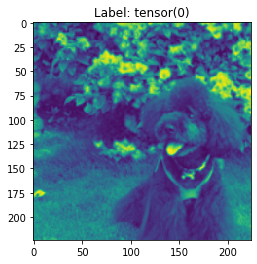

torch.Size([224, 224])
max: 1.0, min: 0.11372549086809158


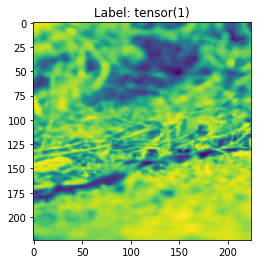

torch.Size([224, 224])
max: 0.9960784316062927, min: 0.027450980618596077


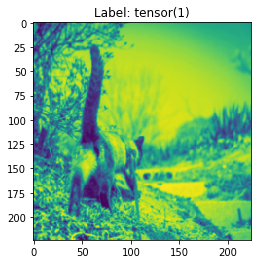

torch.Size([224, 224])
max: 1.0, min: 0.0


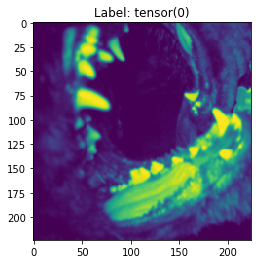

torch.Size([224, 224])
max: 1.0, min: 0.003921568859368563


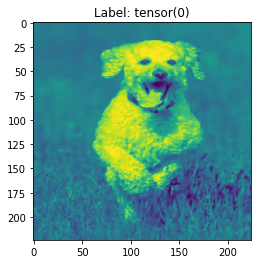

torch.Size([224, 224])
max: 0.9647058844566345, min: 0.05098039284348488


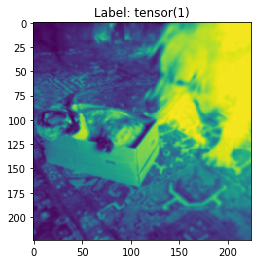

torch.Size([224, 224])
max: 0.9725490212440491, min: 0.003921568859368563


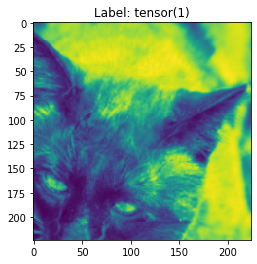

torch.Size([224, 224])
max: 1.0, min: 0.10980392247438431


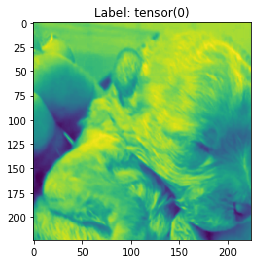

torch.Size([224, 224])
max: 0.8039215803146362, min: 0.027450980618596077


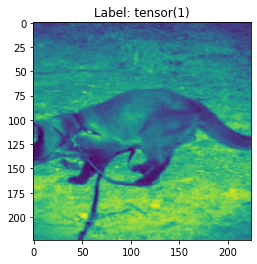

torch.Size([224, 224])
max: 0.8156862854957581, min: 0.10196078568696976


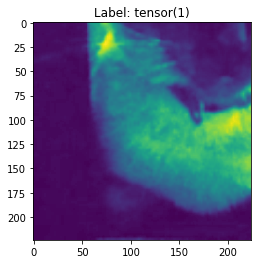

torch.Size([224, 224])
max: 0.9960784316062927, min: 0.04313725605607033


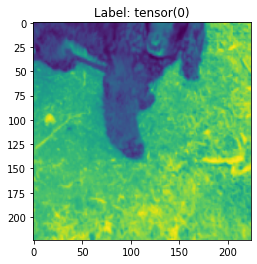

torch.Size([224, 224])
max: 1.0, min: 0.0


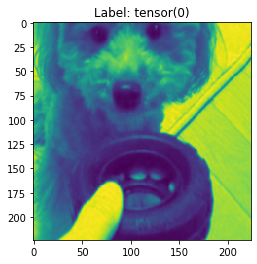

torch.Size([224, 224])
max: 1.0, min: 0.0


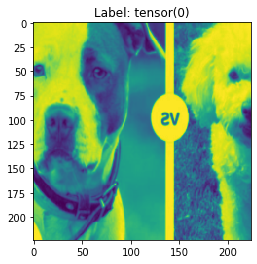

torch.Size([224, 224])
max: 0.8980392217636108, min: 0.003921568859368563


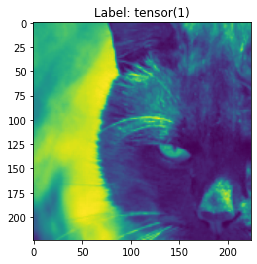

torch.Size([224, 224])
max: 0.9607843160629272, min: 0.027450980618596077


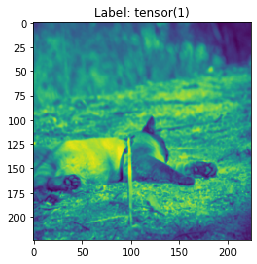

torch.Size([224, 224])
max: 1.0, min: 0.0


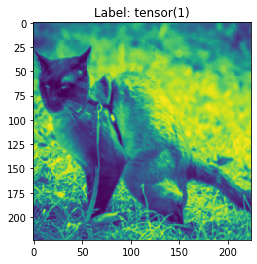

torch.Size([224, 224])
max: 1.0, min: 0.0941176488995552


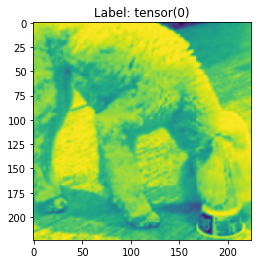

torch.Size([224, 224])
max: 1.0, min: 0.003921568859368563


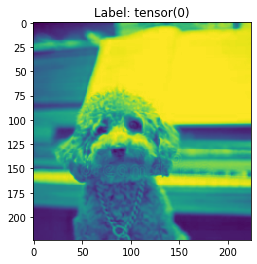

torch.Size([224, 224])
max: 0.9960784316062927, min: 0.0


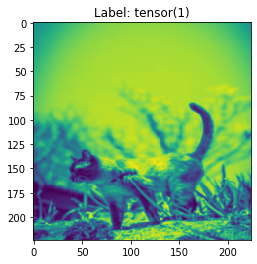

torch.Size([224, 224])
max: 1.0, min: 0.0117647061124444


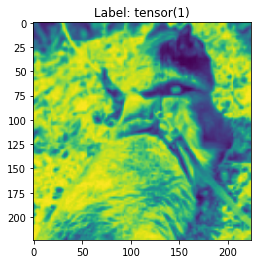

torch.Size([224, 224])
max: 0.7019608020782471, min: 0.0


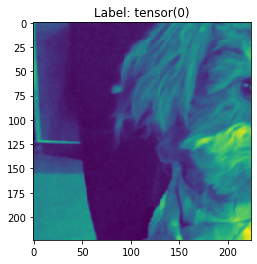

torch.Size([224, 224])
max: 1.0, min: 0.062745101749897


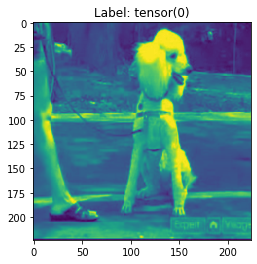

torch.Size([224, 224])
max: 1.0, min: 0.0


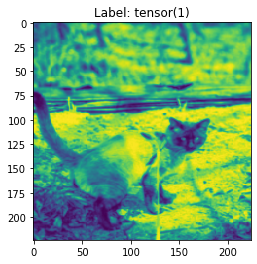

torch.Size([224, 224])
max: 0.9607843160629272, min: 0.003921568859368563


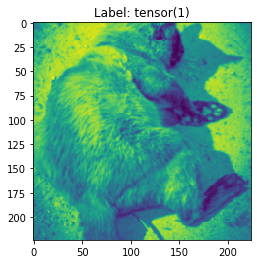

torch.Size([224, 224])
max: 0.9254902005195618, min: 0.04313725605607033


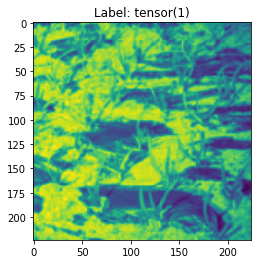

torch.Size([224, 224])
max: 1.0, min: 0.1411764770746231


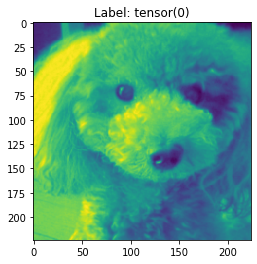

torch.Size([224, 224])
max: 1.0, min: 0.01568627543747425


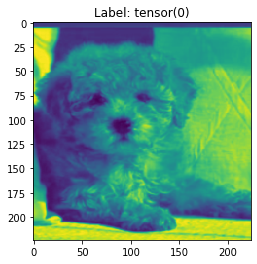

torch.Size([224, 224])
max: 1.0, min: 0.0117647061124444


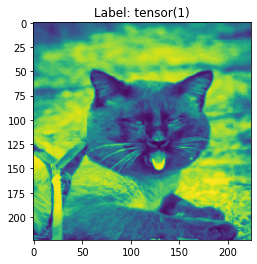

torch.Size([224, 224])
max: 0.9803921580314636, min: 0.007843137718737125


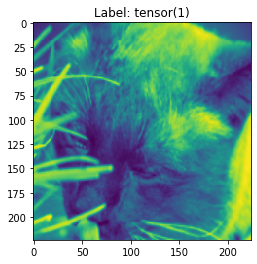

torch.Size([224, 224])
max: 0.8901960849761963, min: 0.0


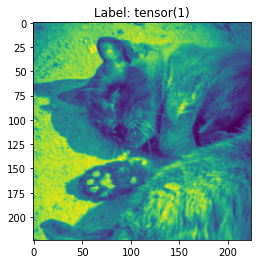

torch.Size([224, 224])
max: 1.0, min: 0.05882352963089943


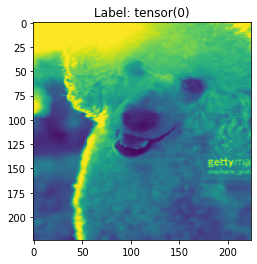

torch.Size([224, 224])
max: 0.9764705896377563, min: 0.0


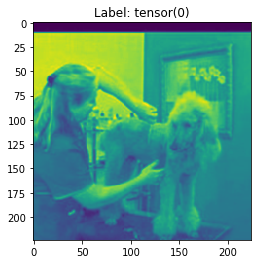

torch.Size([224, 224])
max: 0.9960784316062927, min: 0.125490203499794


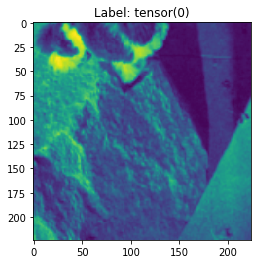

torch.Size([224, 224])
max: 1.0, min: 0.04313725605607033


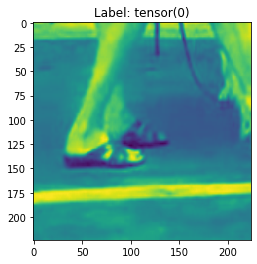

torch.Size([224, 224])
max: 0.9686274528503418, min: 0.0313725508749485


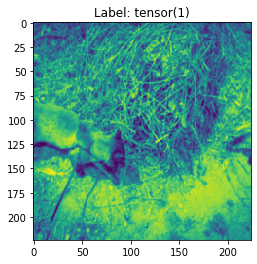

torch.Size([224, 224])
max: 0.9764705896377563, min: 0.15294118225574493


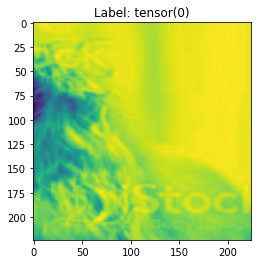

In [4]:
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage
to_img = ToPILImage()

#j,[image,label] in enumerate(train_loader):
for i, [data,label] in enumerate(train_loader):
    img = data[0][0,:]
    print(img.size())
    print("max: {}, min: {}".format(np.max(img.numpy()), np.min(img.numpy())))
    str_title = 'Label: '+str(label[0])
    plt.title(str_title)
    plt.imshow(to_img(img))

    plt.show()

# VGGNet Implementation

**구현할 VGG Net 구조**  
![대체 텍스트](https://qph.fs.quoracdn.net/main-qimg-e657c195fc2696c7d5fc0b1e3682fde6)

**위의 과정에서 3번의 Convolution뒤에 아래 VGGNet의 Model을 참고하여 1 x 1 Convolution을 추가로 넣었다.**  

<img src="https://mblogthumb-phinf.pstatic.net/20160617_220/laonple_14661310924667hDhW_PNG/%C0%CC%B9%CC%C1%F6_6.png?type=w2" width="500" height="300">


## Model 
### 1) Basic Blocks

- 모델에 반복되는 부분이 많기 때문에 이를 함수로 만들어 단순화 한다.
- 맨 위에 이미지를 보면 컨볼루션 연산이 2번 연속하는 경우와 3번 연속하는 경우가 있는데 이를 각각 만들어줍니다.
- 3번 반복하는 Convolution연산인 경우 1 x 1 Convolution 추가


간단한 Output Filter Size를 측정하는 방법을 보게 되면  
- 입력 크기: (H, W)
- 필터 크기: (FH, FW)
- 출력 크기: (OH, OW)
- 패딩: P
- 스트라이드: S

<p>$$OH = \frac{H + 2P - FH}{S} + 1$$</p>
<p>$$OW = \frac{W + 2P - FW}{S} + 1$$</p>

위에서 Filter의 크기는 (3,3) 이므로 FH, FW 에 3을 대입하고 Stride에 1을 대입하게 되면  
Padding = 1로 해주어야지 Input 과 Output의 Size가 같다는 것을 알 수 있다.  
또한 위에서 Pooling 과정에서 Image의 Size가 1/2로 줄어들게 하기 위하여 Filter의 Size는 (2,2) Stride = 2로서 Size를 1/2로 줄인 것을 알 수 있다.

또한 실제 VGG처럼 구현하기 위하여 아래 코드를 추가하였다.  
        nn.Conv2d(out_dim,out_dim,kernel_size=1,padding=0),
        nn.ReLU(),  


**위의 코드의 의미는 1 x 1 Convolution을 사용하므로 개별 픽셀 하나이므로 특징 추출 효과는 거의 없지만 ReLU 활성 함수를 적용하므로 Non-Linearity가 추가되어 Model의 표현력이 더욱 강해진 것이 VGG의 핵심이다.**

In [5]:
# 컨볼루션 연산이 2번 연속하는 경우
# 컨볼루션-활성화함수-컨볼루션-활성화함수-풀링
def conv_2_block(in_dim,out_dim):
    model = nn.Sequential(
        nn.Conv2d(in_dim,out_dim,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.Conv2d(out_dim,out_dim,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )
    return model

  
# 컨볼루션 연산이 3번 연속하는 경우
# 컨볼루션-활성화함수-컨볼루션-활성화함수-컨볼루션-활성화함수-풀링
def conv_3_block(in_dim,out_dim):
    model = nn.Sequential(
        nn.Conv2d(in_dim,out_dim,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.Conv2d(out_dim,out_dim,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.Conv2d(out_dim,out_dim,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.Conv2d(out_dim,out_dim,kernel_size=1,padding=0),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )
    return model

### 2) VGG Model

In [6]:
# 위에서 정의한 블록들을 이용해 VGG 네트워크를 만들어보겠습니다.
# 필터의 개수가 2의 n승의 값을 가지기 때문에 base_dim이란 변수를 추가해서 단순화 했습니다.
# 현재 dog, cat 두 가지 클래스를 구분하려고 하기 때문에 num_classes=2로 설정했습니다.

class VGG(nn.Module):
    def __init__(self, base_dim, num_classes=2):
        super(VGG, self).__init__()
        self.feature = nn.Sequential(
            conv_2_block(3,base_dim),
            conv_2_block(base_dim,2*base_dim),
            conv_3_block(2*base_dim,4*base_dim),
            conv_3_block(4*base_dim,8*base_dim),
            conv_3_block(8*base_dim,8*base_dim),            
        )
        self.fc_layer = nn.Sequential(
            nn.Linear(8*base_dim * 7 * 7, 100),
            nn.ReLU(True),                                                      # True 는 inplace 연산을 하겠다는 의미를 가집니다. inplace 연산은 결과값을 새로운 변수에 값을 저장하는 대신 기존의 데이터를 대체하는것을 의미합니다.
            #nn.Dropout(),
            nn.Linear(100, 20),
            nn.ReLU(True),
            #nn.Dropout(),
            nn.Linear(20, num_classes),
        )

    def forward(self, x):
        x = self.feature(x)
        x = x.view(x.size(0), -1)                                               # x.size(0)를 batch size로 바꿔도 같은 값입니다.
        x = self.fc_layer(x)
        return x
    


## Optimizer & Loss

In [7]:
# gpu가 사용 가능한 경우에는 device를 0번 gpu로 설정하고 불가능하면 cpu로 설정합니다.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# 앞서 정의한대로 vGG 클래스를 인스턴스화 하고 지정한 장치에 올립니다.
model = VGG(base_dim=16).to(device)

# 손실함수 및 최적화함수를 설정합니다.
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# 모델 자녀 노드의 이름과 모듈을 출력합니다.
for i in model.named_children():
    print(i)

cuda:0
('feature', Sequential(
  (0): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (1): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel

## Train

In [8]:
acc_list = []
total_loss = 0
for i in range(num_epoch):
    for j,[image,label] in enumerate(train_loader):
        x = image.to(device)
        y_= label.to(device)
        
        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_func(output,y_)
        loss.backward()
        optimizer.step()
        total_loss = total_loss + loss.item()
    if i % 10 ==0:
        print(loss)
        acc_list.append(total_loss)
        total_loss = 0

tensor(0.7270, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.7072, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.6908, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.7061, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.6847, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.6806, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.7063, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.6847, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.6875, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.6801, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.6786, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.6881, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.7103, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.7063, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.6878, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.6912, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.7056, device='cuda:0', grad_fn=<NllLossBackward

# GoogleNet Implementation
GoogleNet은 2014년 우승을 차지한 Model
Inception Model이라고도 불린다.

<div><img  src="https://user-images.githubusercontent.com/25279765/35002702-d5dccb60-fb2d-11e7-88ac-e29d0319f32b.png" width="500" height="300"></div>

참조: <a href="https://www.cs.unc.edu/~wliu/papers/GoogLeNet.pdf">Going Deeper with Convolutions</a>

Inception Model이라고 불리는 이융는 위의 Model에서 빨간색 동그라미가 쳐져있는 부분은 Inception 모듈을 사용하였기 때문이다.


위에 "참조: Going Deeper with Convolutions"에서 문제점으로 지적한 것에 대해서 알아보자. 

1. VGG는 Convolution Layer를 연속으로 연결하였다. 이러한 문제는 2가지 큰 문제점을 발생 시킨다.
<ul>
<li>차원이 커지게 되어서 연산이 기하급수적으로 늘어나게 된다.</li>
<li>차원이 커진다는 것은 HyperParameter가 많아지게 되므로 Vanishing 문제가 발생하게 된다.</li>
</ul>

>For example, in a deep vision network, if two
convolutional layers are chained, any uniform increase in
the number of their filters results in a quadratic increase of
computation
If the added capacity is used inefficiently (for
example, if most weights end up to be close to zero), then
much of the computation is wasted.

2. Model의 성능을 향상시키기 위하여 Depth 증가를 시키는 것은 2가지 문제점이 발생한다.
<ul>
<li>Hyper Parameter가 많아지게 되어서 Overfitting 위험</li>
<li>Computer 연산처리가 많이 요구되는 단점</li>
</ul>


위와 같은 큰 2가지 해결방법을 위해 제공된 Model이 **Inception Model**이다.

## Inception Module

- 인셉션 모듈을 구성하는 4가지 연산을 함수로 정의해놓습니다.
- 1x1 컨볼루션
- 1x1 컨볼루션 -> 3x3 컨볼루션
- 1x1 컨볼루션 -> 5x5 컨볼루션
- 3x3 맥스풀링 ->1x1 컨볼루션

<div><img  src="https://user-images.githubusercontent.com/25279765/35002517-441c8166-fb2d-11e7-9b40-b4216256cbb0.jpg" width="500" height="300"></div>

위의 그림은 다음과 같은 특징을 가지게 된다.

**Sparse한 구조**<br>위에서 지적한 문제점 "1.Convolution Layer를 연속으로 연결"을 Sparse한 형태로서 해결하게 되었다.

하나의 Input을 여러개의 Convolution Layer로서 계산을 하여 연속적으로 연결하였을 때의 해결을 하였다.
>A fundamental way of solving both of these issues would
be to introduce sparsity and replace the fully connected layers by the sparse ones, even inside the convolutions

<br><br>


**Dense한 구조**<br>그 뒤의 Filter concatenation을 연결하는 것으로서 다시 Dense한 Data의 형태로서 합치는 작업을 한다. Dense한 Data의 형태로서 바꾸는 것은 Computer의 연산이 이러한 형태가 빠르기 때문이다.
>Unfortunately, today’s computing infrastructures are
very inefficient when it comes to numerical calculation on
non-uniform sparse data structures. Even if the number of
arithmetic operations is reduced by 100×, the overhead of
lookups and cache misses would dominate: switching to
sparse matrices might not pay off.

<br><br>


**1 x 1 Convolution**<br>VGG Model에서는 1 x 1 Convolution Layer를 Model의 비선형을 향상시키기 위하여 사용하였다고 하였다.
하지만 GoogleNet은 "2. Model의 성능을 향상시키기 위하여 Depth 증가" 이유때문에 사용하였다.

1 x 1 Convolution Layer는 Model에 비선형을 향상시키는 역활과 동시에 **Output의 Channel 개수를 줄이게 되면 Data의 크기가 작아지는 효과**(RNN에서의 Embedding과 같은 효과)를 발생시킬 수 있다.
이로 인하여 Overfitting 의 문제와 Trainning 시간 감소라는 장점이 생기게 되었다.

이러한 Data의 축소라는 장점으로 인하여 연산량이 비교적 큰 3 x 3 Convolution과 5 x 5 Convolution전에 사용된다.
>However,
in our setting, 1 × 1 convolutions have dual purpose: most
critically, they are used mainly as dimension reduction modules to remove computational bottlenecks, that would otherwi
se limit the size of our networks. This allows for not
just increasing the depth, but also the width of our networks
without a significant performance penalty


<br><br>

**작은 사이즈의 Filter(1 x 1, 3 x 3, 5 x 5)사용**<br>
더욱더 많은 정보가 담긴 Output을 추출하기 위하여 작은 크기의 Filter 사용
(연산량도 적어지는 효과가 추가로 있다.)
>However, one can also
expect that there will be a smaller number of more spatially
spread out clusters that can be covered by convolutions over
larger patches, and there will be a decreasing number of
patches over larger and larger regions. In order to avoid
patch-alignment issues, current incarnations of the Inception architecture are restricted to filter sizes 1×1, 3×3 and
5×5; this decision was based more on convenience rather
than necessity.

<br><br>

In [9]:
def conv_1(in_dim,out_dim):
    model = nn.Sequential(
        nn.Conv2d(in_dim,out_dim,1,1),
        nn.ReLU(),
    )
    return model

def conv_1_3(in_dim,mid_dim,out_dim):
    model = nn.Sequential(
        nn.Conv2d(in_dim,mid_dim,1,1),
        nn.ReLU(),
        nn.Conv2d(mid_dim,out_dim,3,1,1),
        nn.ReLU()
    )
    return model
    
def conv_1_5(in_dim,mid_dim,out_dim):
    model = nn.Sequential(
        nn.Conv2d(in_dim,mid_dim,1,1),
        nn.ReLU(),
        nn.Conv2d(mid_dim,out_dim,5,1,2),
        nn.ReLU()
    )
    return model
    

def max_3_1(in_dim,out_dim):
    model = nn.Sequential(
        nn.MaxPool2d(3,1,1),
        nn.Conv2d(in_dim,out_dim,1,1),
        nn.ReLU(),
    )
    return model

class inception_module(nn.Module):
    def __init__(self,in_dim,out_dim_1,mid_dim_3,out_dim_3,mid_dim_5,out_dim_5,pool):
        super(inception_module,self).__init__()
        self.conv_1 = conv_1(in_dim,out_dim_1)
        self.conv_1_3 = conv_1_3(in_dim,mid_dim_3,out_dim_3)
        self.conv_1_5 = conv_1_5(in_dim,mid_dim_5,out_dim_5)
        self.max_3_1 = max_3_1(in_dim,pool)

    def forward(self,x):
        out_1 = self.conv_1(x)
        out_2 = self.conv_1_3(x)
        out_3 = self.conv_1_5(x)
        out_4 = self.max_3_1(x)
        output = torch.cat([out_1,out_2,out_3,out_4],1)
        return output

### GoogLeNet 구조
![대체 텍스트](https://cdn-images-1.medium.com/max/1600/1*CWJGqfLiVjHAIan82nPbjg.png)

In [10]:
# 표와 비교하면서 볼 수 있도록 구현했습니다. 

class GoogLeNet(nn.Module):
    def __init__(self, base_dim, num_classes=2):
        super(GoogLeNet, self).__init__()
        self.num_classes=num_classes
        self.layer_1 = nn.Sequential(
            nn.Conv2d(3,base_dim,7,2,3),
            nn.MaxPool2d(3,2,1),
            nn.Conv2d(base_dim,base_dim*3,3,1,1),
            nn.MaxPool2d(3,2,1),
        )
        self.layer_2 = nn.Sequential(
            inception_module(base_dim*3,64,96,128,16,32,32),
            inception_module(base_dim*4,128,128,192,32,96,64),
            nn.MaxPool2d(3,2,1),
        )
        self.layer_3 = nn.Sequential(
            inception_module(480,192,96,208,16,48,64),
            inception_module(512,160,112,224,24,64,64),
            inception_module(512,128,128,256,24,64,64),
            inception_module(512,112,144,288,32,64,64),
            inception_module(528,256,160,320,32,128,128),
            nn.MaxPool2d(3,2,1),
        )
        self.layer_4 = nn.Sequential(
            inception_module(832,256,160,320,32,128,128),
            inception_module(832,384,192,384,48,128,128), 
            nn.AvgPool2d(7,1),
        )
        self.layer_5 = nn.Dropout2d(0.4)
        self.fc_layer = nn.Linear(1024,self.num_classes)
                
        
    def forward(self, x):
        out = self.layer_1(x)
        out = self.layer_2(out)
        out = self.layer_3(out)
        out = self.layer_4(out)
        out = self.layer_5(out)
        out = out.view(batch_size,-1)
        out = self.fc_layer(out)
        return out

## Optimizer & Loss

In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

model = GoogLeNet(base_dim=64)
for i in model.named_children():
    print(i)

model = GoogLeNet(base_dim=64).to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=learning_rate)

cuda:0
('layer_1', Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (1): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (2): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
))
('layer_2', Sequential(
  (0): inception_module(
    (conv_1): Sequential(
      (0): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1))
      (1): ReLU()
    )
    (conv_1_3): Sequential(
      (0): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1))
      (1): ReLU()
      (2): Conv2d(96, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
    )
    (conv_1_5): Sequential(
      (0): Conv2d(192, 16, kernel_size=(1, 1), stride=(1, 1))
      (1): ReLU()
      (2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (3): ReLU()
    )
    (max_3_1): Sequential(
      (0): MaxPool2d(kernel_size=3, stride=1, pad

## Train

In [12]:
acc_list2 = []
total_loss = 0
for i in range(num_epoch):
    for j,[image,label] in enumerate(train_loader):
        x = image.to(device)
        y_= label.to(device)
        
        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_func(output,y_)
        loss.backward()
        optimizer.step()
        total_loss = total_loss + loss.item()
    if i % 10 ==0:
        print(loss)
        acc_list2.append(total_loss)
        total_loss = 0

tensor(0.7035, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.7015, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.6997, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.6968, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.7005, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.6882, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.7086, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.6954, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.7113, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.6853, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.6847, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.7074, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.7073, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.6385, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.7184, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.5975, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2091, device='cuda:0', grad_fn=<NllLossBackward

### 추가사항
**Gradient Vanishing**
GoogleNet을 보면 위와 같은 중간중간 분류기가 계속적으로 존재한다는 것을 알 수 있다.
<br><br>

<div><img  src="https://norman3.github.io/papers/images/google_inception/f04.png" width="500" height="300"></div>

중간중간 분류기를 두어서 Loss에 더함으로 인하여 Gradinet Vanishing 문제를 해결하고자 하였다.
>By adding auxiliary classifiers connected to these intermediate layers, discrimination
in the lower stages in the classifier was expected.
This was thought to combat the vanishing gradient problem while providing regularization

**Stem 영역**
초반에는 Inception Module로서 구성을 하지 않는데 이유는 "초반에는 아무런 효과가 없기 때문이다." 라고 발표하였다.

<div><img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/AI/119.PNG" height="300" width="500" /></div>

# Residual Networks

ResNet은 2015년 우승을 차지한 Model 이다.

![alt text](https://www.codeproject.com/KB/AI/1248963/resnet.png)

참조: <a href="https://arxiv.org/pdf/1512.03385.pdf">Deep Residual Learning for Image Recognition
</a>

ResNet의 궁극적인 목적은 위의 두 Model과 같이 층을 더 깊게 쌓는 것을 목적으로 한다

먼저 ResNet이 나오게 된 배경을 알아보자.
결과적으로 위의 2가지의 Model과 같이 CNN의 망을 깊게 쌓고 싶은 문제에서부터 시작한다.
위에서도 언급하였지만 Layer의 Depth가 깊어짐에 따라서 많은 문제가 발생하게 된다.(Gradient vanishing 등...)
따라서 Layer의 Depth를 증가시킴에 따라서 다음과 같은 문제가 발생하게 된다.
위의 그림은 해당 논문에서 실험한 그래프이다.
<img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/AI/120.PNG"/>
망을 깊게 쌓는것이 효율이 좋은 것이라는 것을 알 수 있지만 실질적으로 구성하였을때 Error율이 더 높은 것을 확인할 수 있다.
이러한 문제를 **Degradation** 이라 한다.
>The deeper network
has higher training error, and thus test error. Similar phenomena
on ImageNet is presented in Fig. 4.

위와 같은 **Degradation**문제를 해결하기 위하여 ResNet을 구성하게 되었다.
ResNet 목적은 기존의 Model들과 달리 잔차를 활용하여 Layer를 구성하였다.
>We explicitly reformulate the layers as learning residual functions with reference to the layer inputs, instead of learning unreferenced functions

>easier to optimize, and can gain accuracy from
considerably increased depth. 


위와 같이 잔차를 이용하여 Layer를 구성하는 것을 Skip Connection이라 하며 구조는 아래와 같다.
<img src="https://i.imgur.com/fse3Ntq.png"/>

이러한 구조는 Shorcut connection이라고도 불린다.
위와 같은 구조는 크게 2가지의 장점이 존재 한다.

1) Optimize를 새로운 방식이 아니라 기존에 사용하던 방식을 사용하면 된다.

2) 망을 깊게 쌓을 수 있어서 정확도 향상을 기대할 수 있다.
>: 1) Our extremely deep residual nets
are easy to optimize, but the counterpart “plain” nets (that
simply stack layers) exhibit higher training error when the
depth increases; 

>2) Our deep residual nets can easily enjoy
accuracy gains from greatly increased depth, producing results substantially better than previous networks.

LSTM과 같이 Gate가 추가된 Layer라고 생각하면 되지만, 항상 열려있는것이 다른점이다. 또한 모든 100%를 전달한다는 것이 다른 점 이다.
>On the contrary, our formulation always learns
residual functions; our identity shortcuts are never closed,
and all information is always passed through, with additional residual functions to be learned.

**Skip Connection**을 살펴보게 되면 기존의 Neural Network와 다른 개념이라는 것을 알 수 있다.
기존 Neural Network는 다음과 같다고 가정하자.
- Input Data: x
- Output Data: y
- Model Output: $H(x)$
- Loss Function: $H(x)$-y

즉 위와 같은 일반적인 NeuralNetwork는 Model의 Output과 Target Data가 같아 지는 것을 목표로 하고 Model을 Trainning을 하게 된다.

**Skip Connection**의 핵심아이디어는 일반적인 NeuralNetwork와 달리 **y는 x를 대표하는 값이라고 생각할 수 있다**이다.

위와 같은 생각으로 인하여 **Loss Function을 $H(x)$-y 로 잡는 것이 아닌 $H(x)$-x로 생각하는 것이 핵심**이다.

즉 위와 같은 가정을 하게 되면 $F(x) = H(x)$-x이라는 $F(x)$을 추가하게 되면 결과적인 식은 다음과 같다.

$F(x) + x = H(x)$

즉 **Model의 Output과 Model에 들어가는 Input을 더하여 Model의 Output으로 최종적으로 산출한다는 것** 이다.

이러한 Skip Connection을 수식으로 정리하면 다음과 같다.

$y = F(x,{W_i})+x - (1)$

$F = W_2\sigma(W_1x)$

그러나 위의 식으로서 생각을 하게 된다면 만약 weight Layer를 통하여 나온 Output의 행렬이 다르게 된다면 행렬이 크기를 맞춰줄 필요가 있다.
이러한 행렬의 Dimension을 해결하기 위하여 Square Matrix인 $W_s$를 사용한다.
최종적인 식을 아래와 같다.

$y = F(x,{W_i})+W_sx - (2)$

Square Matrix는 행렬의 차원을 맞춰줄 때(Channel의 크기가 변할때)사용한다.

위의 (1), (2)식을 두가지로 나타내었다.

해당 논문에서는 (1)의 식으로 계산을 하여도 충분하다는 결론이 나오게 되었다. (2)의 식으로서 계산을 하게 되면 Forward와 Backward에서 연산량이 증가하기 때문이다.

따라서 대부분은 (1)의 식을 사용하나 Channel이 바뀌게 되는 즉, Dimension이 바뀌게 되는 경우에는 (2)식을 사용하여 Dimension을 맞춰주는 과정을 거쳐야 한다.

>The dimensions of x and F must be equal in Eqn.(1).
If this is not the case (e.g., when changing the input/output
channels), we can perform a linear projection Ws by the
shortcut connections to match the dimensions:
y = F(x, {Wi}) + Wsx. (2)
We can also use a square matrix Ws in Eqn.(1). But we will
show by experiments that the identity mapping is sufficient
for addressing the degradation problem and is economical,
and thus Ws is only used when matching dimensions.

<img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/AI/121.PNG"/>
위의 그림은 ResNet으로서 확인한 결과이다.
기존망은 망이 깊어질 수록 Error율이 향상되는 것을 볼 수 있지만, ResNet으로서 구성한 망은 망을 깊게 쌓아도 Error율이 오히려 낮아지는 것을 확인할 수 있다.

<table>

<tr>
    <td></td><td>Plain</td><td>ResNet</td>
</tr>

<tr>
    <td>18layers</td><td>27.94</td><td>27.88</td>
</tr>

<tr>
    <td>34layers</td><td>28.54</td><td>25.03</td>
</tr>

</table>


**Deeper Bootleneck Architecture**
위에 GoogleNet에서 **1 x 1 Convolution**을 사용하여 여러 문제를 해결하였다.
ResNet Model에서도 GoogleNet에서 1 x 1 Convolution을 사용한 이유와 같은 이유로서 사용하였다.
최종적인 Model인 **Boottleneck**구조는 아래 그림과 같다.

<img src="https://mblogthumb-phinf.pstatic.net/20160718_106/laonple_1468811198436NtRow_PNG/%C0%CC%B9%CC%C1%F6_83.png?type=w2"/>

- 1 x 1 Convolution: Input Data의 Channel을 줄이기 위한 과정
- 3 x 3 Convolution: 줄어든 Input Data로 인하여 연산시간 감소
- 1 x 1 Convolution: Input Data의 줄어든 Channel을 다시 늘리기 위한 과정


참조:<a href="https://datascienceschool.net/view-notebook/958022040c544257aa7ba88643d6c032/">데이터 사이언스 스쿨</a><br>

## Model 
### 1) Basic Block

- 컨볼루션 연산과 활성화함수는 항상 붙어 있기 때문에 이를 함수로 만들었습니다.

In [13]:
def conv_block_1(in_dim,out_dim,act_fn,stride=1):
    model = nn.Sequential(
        nn.Conv2d(in_dim,out_dim, kernel_size=1, stride=stride),
        act_fn,
    )
    return model


def conv_block_3(in_dim,out_dim,act_fn):
    model = nn.Sequential(
        nn.Conv2d(in_dim,out_dim, kernel_size=3, stride=1, padding=1),
        act_fn,
    )
    return model

### 2) Bottle Neck Module

![alt text](https://www.codeproject.com/KB/AI/1248963/resnet.png)

위의 Model을 그대로 구현하는 과정이다. 여기서 2가지의 경우로 나뉘게 된다.
- 기존 과정: 위에서 언급한 (1)의 식을 사용한다. Dimension이 바뀌지 않는 경우 이다. 실선으로 표현.
- DownSampleing: 위에서 언급한 (2)의 식을 사용한다. Dimension을 줄여서 DownSampling을 하는 과정이다. 점선으로 표현. Stride를 2로하여서 Image의 크기를 반으로 줄였다.

In [14]:
class BottleNeck(nn.Module):
    def __init__(self,in_dim,mid_dim,out_dim,act_fn,down=False):
        super(BottleNeck,self).__init__()
        self.down=down
        
        # 특성지도의 크기가 감소하는 경우
        if self.down:
            self.layer = nn.Sequential(
              conv_block_1(in_dim,mid_dim,act_fn,2),
              conv_block_3(mid_dim,mid_dim,act_fn),
              conv_block_1(mid_dim,out_dim,act_fn),
            )
            self.downsample = nn.Conv2d(in_dim,out_dim,1,2)
            
        # 특성지도의 크기가 그대로인 경우
        else:
            self.layer = nn.Sequential(
                conv_block_1(in_dim,mid_dim,act_fn),
                conv_block_3(mid_dim,mid_dim,act_fn),
                conv_block_1(mid_dim,out_dim,act_fn),
            )
            
        # 더하기를 위해 차원을 맞춰주는 부분
        self.dim_equalizer = nn.Conv2d(in_dim,out_dim,kernel_size=1)
                  
    def forward(self,x):
        if self.down:
            downsample = self.downsample(x)
            out = self.layer(x)
            out = out + downsample
        else:
            out = self.layer(x)
            if x.size() is not out.size():
                x = self.dim_equalizer(x)
            out = out + x
        return out


### 3) ResNet Model

In [15]:
class ResNet(nn.Module):

    def __init__(self, base_dim, num_classes=2):
        super(ResNet, self).__init__()
        self.act_fn = nn.ReLU()
        self.layer_1 = nn.Sequential(
            nn.Conv2d(3,base_dim,7,2,3),
            nn.ReLU(),
            nn.MaxPool2d(3,2,1),
        )
        self.layer_2 = nn.Sequential(
            BottleNeck(base_dim,base_dim,base_dim*4,self.act_fn),
            BottleNeck(base_dim*4,base_dim,base_dim*4,self.act_fn),
            BottleNeck(base_dim*4,base_dim,base_dim*4,self.act_fn,down=True),
        )   
        self.layer_3 = nn.Sequential(
            BottleNeck(base_dim*4,base_dim*2,base_dim*8,self.act_fn),
            BottleNeck(base_dim*8,base_dim*2,base_dim*8,self.act_fn),
            BottleNeck(base_dim*8,base_dim*2,base_dim*8,self.act_fn),
            BottleNeck(base_dim*8,base_dim*2,base_dim*8,self.act_fn,down=True),
        )
        self.layer_4 = nn.Sequential(
            BottleNeck(base_dim*8,base_dim*4,base_dim*16,self.act_fn),
            BottleNeck(base_dim*16,base_dim*4,base_dim*16,self.act_fn),
            BottleNeck(base_dim*16,base_dim*4,base_dim*16,self.act_fn),            
            BottleNeck(base_dim*16,base_dim*4,base_dim*16,self.act_fn),
            BottleNeck(base_dim*16,base_dim*4,base_dim*16,self.act_fn),
            BottleNeck(base_dim*16,base_dim*4,base_dim*16,self.act_fn,down=True),
        )
        self.layer_5 = nn.Sequential(
            BottleNeck(base_dim*16,base_dim*8,base_dim*32,self.act_fn),
            BottleNeck(base_dim*32,base_dim*8,base_dim*32,self.act_fn),
            BottleNeck(base_dim*32,base_dim*8,base_dim*32,self.act_fn),
        )
        self.avgpool = nn.AvgPool2d(7,1) 
        self.fc_layer = nn.Linear(base_dim*32,num_classes)
        
    def forward(self, x):
        out = self.layer_1(x)
        out = self.layer_2(out)
        out = self.layer_3(out)
        out = self.layer_4(out)
        out = self.layer_5(out)
        out = self.avgpool(out)
        out = out.view(batch_size,-1)
        out = self.fc_layer(out)
        
        return out


## Optimizer & Loss

In [16]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
    
model = ResNet(base_dim=64).to(device)

'''
for i in model.children():
    print(i)
'''

loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=learning_rate)

cuda:0


## Train

In [17]:
acc_list3 = []
total_loss = 0
for i in range(num_epoch):
    for j,[image,label] in enumerate(train_loader):
        x = image.to(device)
        y_= label.to(device)
        
        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_func(output,y_)
        loss.backward()
        optimizer.step()
        total_loss = total_loss + loss.item()
    if i % 10 ==0:
        print(loss)
        acc_list3.append(total_loss)
        total_loss = 0

tensor(0.8684, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.7172, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.6838, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.6995, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.6964, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.6951, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.6905, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.6929, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0212, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(5.2235, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(11.6956, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.4657, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.1720, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.8815, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.4713, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0234, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.9822, device='cuda:0', grad_fn=<NllLossBackwar

3가지 Model Loss 비교

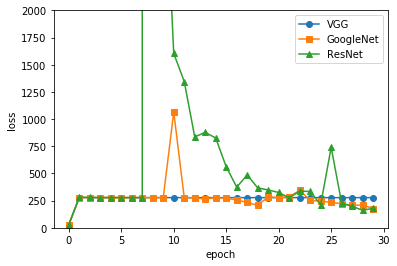

In [24]:
x = np.arange(num_epoch/10)
   

plt.plot(x, acc_list, marker='o',label='VGG')
plt.plot(x, acc_list2, marker='s',label='GoogleNet')
plt.plot(x, acc_list3, marker='^',label='ResNet')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim(0, 2000)
plt.show()